# Basit Doğrusal Regresyon

## Tahmin Modeli

In [9]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\Users\frkng\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


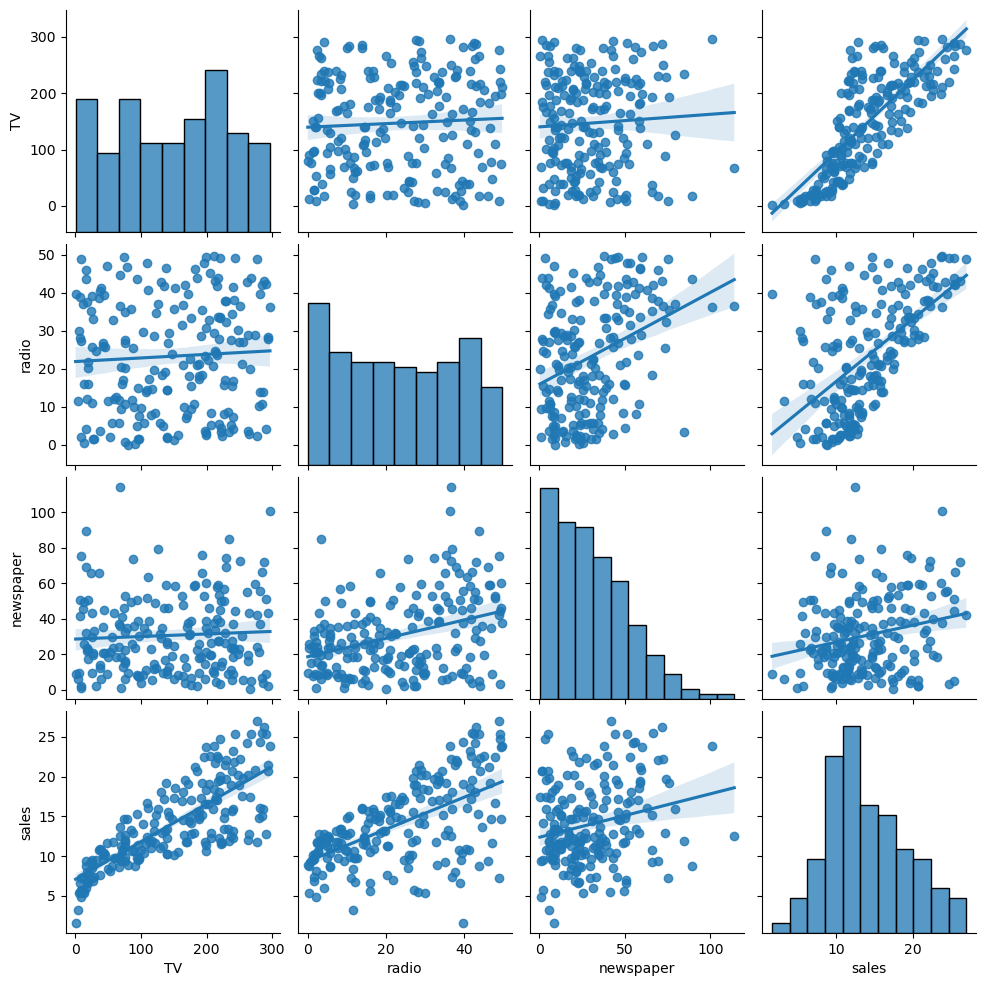

In [14]:
import seaborn as sns
sns.pairplot(df, kind = "reg")

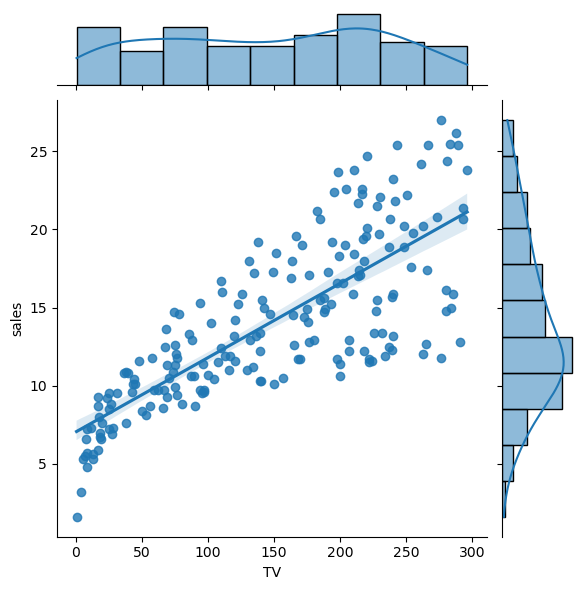

In [15]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

### StatsModel ile Modelleme

In [16]:
import statsmodels.api as sm
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
## Bo = Y|  - B1X -> sabit terim bulmak için model formulü
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [18]:
y = df["sales"]

In [19]:
lm = sm.OLS(y,X)

In [20]:
model = lm.fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        16:32:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import statsmodels.formula.api as smf ##farklı bir kullanım türü
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        16:32:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [24]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [25]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [26]:
model.f_pvalue

1.467389700194647e-42

In [27]:
model.fvalue

312.144994372713

In [28]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [29]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

(0.0, 28.27)

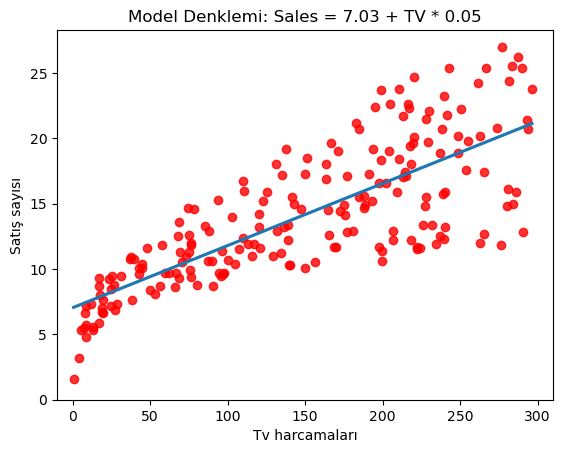

In [30]:
import matplotlib.pyplot as plt
intercept = model.params[0]  # Sabit terim (beta_0)
slope = model.params[1]  # TV'nin katsayısı (beta_1)
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={"color": "red"})
g.set_title(f"Model Denklemi: Sales = {intercept:.2f} + TV * {slope:.2f}")
g.set_ylabel("Satış sayısı")
g.set_xlabel("Tv harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom = 0)

### çoklu regresyon grafiğinden denklem çıkarma: $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \dots + \beta_n X_n + \varepsilon$$


In [31]:
from sklearn.linear_model import LinearRegression
x = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(x,y)
model.intercept_
model.coef_

array([[0.04753664]])

In [32]:
model.score(x,y)

0.611875050850071

## Tahmin

Model Denklemi: 

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [33]:
x = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(x,y)

In [34]:
model.predict([[30]])

C:\Users\frkng\.conda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8.45869276]])

In [35]:
yeni_veri = [[5], [90], [200]]

In [36]:
model.predict(yeni_veri)

C:\Users\frkng\.conda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        16:32:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
mse = mean_squared_error(y, model.fittedvalues)

In [40]:
mse

10.512652915656757

In [41]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [42]:
tahmin_y = reg.predict(x)[0:10]
tahmin_y

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [43]:
y[:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [44]:
k_t = pd.DataFrame({
    "gercek_y": y.to_numpy()[:10].reshape(-1),  # y'yi NumPy array'e çevir, sonra 1D yap
    "tahmin_y": reg.predict(x)[:10].reshape(-1)  # Tahmini 1D'ye çevir
})
print(k_t)


   gercek_y   tahmin_y
0      22.1  17.970775
1      10.4   9.147974
2       9.3   7.850224
3      18.5  14.234395
4      12.9  15.627218
5       7.2   7.446162
6      11.8   9.765950
7      13.2  12.746498
8       4.8   7.441409
9      10.6  16.530414


In [45]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [46]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [47]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [48]:
np.mean(k_t["hata_kare"])

9.290350329638104

In [49]:
np.sqrt(np.sum(k_t["hata_kare"]))

9.63864634149324

In [54]:
model.resid[:10] ##artık değerler

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

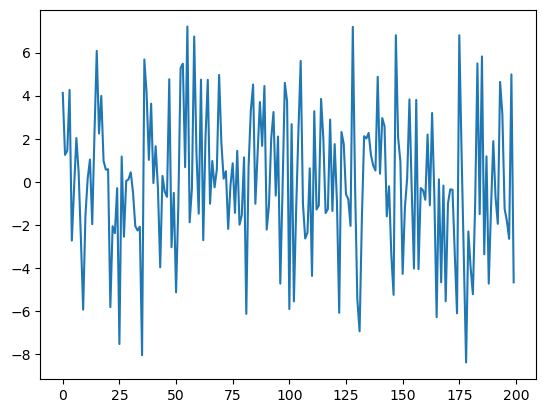

In [53]:
plt.plot(model.resid)

## Çoklu Doğrusal Regresyon

In [58]:
import pandas as pd
ad = pd.read_csv("advertising.csv", usecols=[1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [64]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
training = df.copy()

### StatsModel

In [66]:
lm = sm.OLS(y_train, X_train)

In [68]:
model = lm.fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                   1.28e-137
Time:                        16:22:57   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scikit-Learn Model

In [70]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [71]:
model.intercept_

2.979067338122629

In [72]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

Model Denklemi:

Sales = 2.97 + TV*0.04 + radio*0.18 + newspaper*0.002

30 birim TV, 10 birim radio, 40 birim newspaper harcamasında satışların tahmin değeri nedir?

In [90]:
yeni_veri = [[30], [10], [40]]

In [93]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [94]:
yeni_veri

,0,1,2
0,30,10,40


In [95]:
model.predict(yeni_veri)

C:\Users\frkng\.conda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [97]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [98]:
rmse

1.644727765644337

In [99]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [100]:
rmse

1.7815996615334502

## Model Tuning/Model Doğrulama

In [101]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [113]:
X = df.drop("sales", axis = 1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=144)

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [125]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [126]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701033

In [115]:
model.score(X_train, y_train)

0.8971614078663419

In [116]:
cross_val_score(model, X_train,y_train, cv = 10, scoring="r2").mean()

0.8733783298422942

In [123]:
np.sqrt(-cross_val_score(model, X_train,y_train, cv = 10, scoring="neg_mean_squared_error")).mean()

1.6649345607872932

In [127]:
np.sqrt(-cross_val_score(model, X_test,y_test, cv = 10, scoring="neg_mean_squared_error")).mean()

1.7399924960346644

## PCR Model -Temel Bileşen Regresyonu

In [130]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [136]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [137]:
y= df["Salary"]

In [151]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

In [152]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [157]:
X =pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

In [158]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = df.copy()
print(training.shape)

(263, 20)


In [181]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [182]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [183]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [208]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:20]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28, 98.01, 98.68, 99.18, 99.49, 99.74, 99.9 , 99.96, 99.98,
       99.99])

In [191]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [192]:
pcr_model.intercept_

543.4834416243655

In [193]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

### Tahmin

In [194]:
y_pred = pcr_model.predict(X_reduced_train)

In [195]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [197]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [198]:
df["Salary"].mean()

535.9258821292775

In [199]:
r2_score(y_train, y_pred)

0.5770075250410179

In [200]:
pca2 = PCA()

In [201]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [202]:
y_pred = pcr_model.predict(X_reduced_test)

In [203]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499634

In [204]:
r2_score(y_test, y_pred)

0.2417046364031331

## Model Tuning

In [214]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:, 0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:, 0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

390.7914255682224
0.2945266546553502


In [215]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits=10,
                             shuffle=True,
                             random_state=1)

In [218]:
lm = LinearRegression()

In [219]:
RMSE = []

In [224]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                      X_reduced_train[:,:i],
                                                      y_train.ravel(),
                                                      cv=cv_10,
                                                      scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

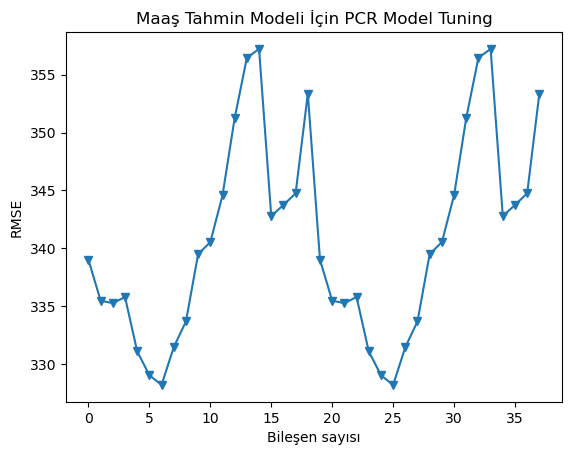

In [225]:
plt.plot(RMSE, "-v")
plt.xlabel("Bileşen sayısı")
plt.ylabel("RMSE")
plt.title("Maaş Tahmin Modeli İçin PCR Model Tuning");

In [226]:
lm = LinearRegression()

In [227]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [228]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [235]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))
print(r2_score(y_train, y_pred))

308.82659830945005
0.5180774406506967


y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [237]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

393.1198700096223
0.2860947951938194


## Kısmi En Küçük Kareler Regresyonu (PLS)

### Model

In [250]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [251]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [254]:
pls_model = PLSRegression(n_components=6).fit(X_train,y_train)

In [255]:
pls_model.coef_

array([[-108.74143193,  197.6386967 ,   22.57338481,   26.52768741,
         -25.67952167,   54.16363009,  -25.89997437,    5.36637756,
          89.44665343,   26.79039104,  102.43239418,   68.82932424,
         -61.11470635,   94.44121847,   26.38215013,  -45.01850138,
          77.17773908,  -35.85447586,  -45.66863853]])

In [270]:
pls_model = PLSRegression().fit(X_train,y_train)

In [253]:
pls_model.coef_

array([[ 35.32916493,  48.83425857,  18.50240933,  39.28117603,
         30.59952998,  40.03398345,  16.85990516,  28.22289896,
         32.73784993,  22.00875744,  33.60903032,  30.39402522,
         25.73279799,  54.98835148,   6.56590871,  -0.90894359,
         17.60903423, -37.24246339,  14.69680385]])

### Tahmin

In [267]:
pls_model.predict(X_train)

array([[ 341.05563915],
       [ 818.68494511],
       [ 609.92707458],
       [ 125.15977454],
       [ 458.61602947],
       [1043.93221907],
       [ 172.32918764],
       [ 317.29628026],
       [ 518.8844206 ],
       [ 915.63364085],
       [1540.30720929],
       [ 873.76112126],
       [ 921.90821595],
       [ 712.10720265],
       [ 745.20438376],
       [ 675.13449788],
       [1053.16828064],
       [ -10.88359634],
       [ 217.63225497],
       [ 355.30260642],
       [ 707.22856394],
       [ 959.66365088],
       [ 485.04725609],
       [ 447.27394908],
       [  52.72818717],
       [ 653.63784896],
       [ 536.91333427],
       [ 280.4588824 ],
       [ 292.65596902],
       [ 193.8538735 ],
       [ 217.18485851],
       [ 509.61536744],
       [ 990.08973048],
       [ 242.61845035],
       [ 423.41564365],
       [ 352.22428786],
       [ 363.61331264],
       [ 625.43554681],
       [ 341.25211402],
       [ 236.07779623],
       [ 164.23487647],
       [ 265.143

In [271]:
y_pred = pls_model.predict(X_train)

In [272]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))
r2_score(y_train,y_pred)

310.1167593109696


0.5140424486535482

In [274]:
y_pred = pls_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test,y_pred)

398.09956327448526


0.2678940112232917

### Model Tuning

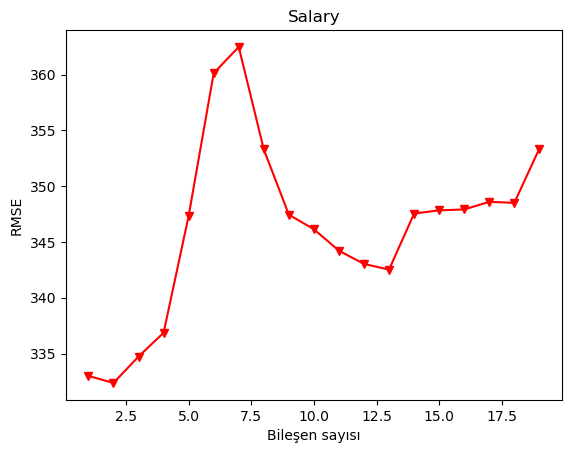

In [276]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits=10,
                             shuffle=True,
                             random_state=1)
RMSE = []
for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls,
                                       X_train,
                                       y_train,
                                       cv=cv_10,
                                       scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
plt.plot(np.arange(1,X_train.shape[1] + 1 ), np.array(RMSE), "-v", c= "r")
plt.xlabel("Bileşen sayısı") 
plt.ylabel("RMSE")
plt.title("Salary");

In [277]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [278]:
y_pred = pls_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test,y_pred)

398.09956327448526


0.2678940112232917

## Ridge Regresyon 

In [279]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [280]:
from sklearn.linear_model import Ridge

In [288]:
# Ridge modelini eğitme
ridge = Ridge(alpha=1.0)  # Lambda (alpha) değeri burada belirleniyor
ridge.fit(X_train_scaled, y_train)

Ridge()

In [289]:
ridge_model.coef_

array([  -1.77330485,    8.79996129,    7.2989486 ,   -3.33275262,
         -2.08439225,    5.42579047,    7.59379394,   -0.13776204,
         -0.20640067,   -0.60047764,    1.79228392,    0.72742823,
         -0.68742173,    0.26153114,    0.26904307,   -0.532427  ,
        113.35045256, -100.01732569,  -49.18819285])

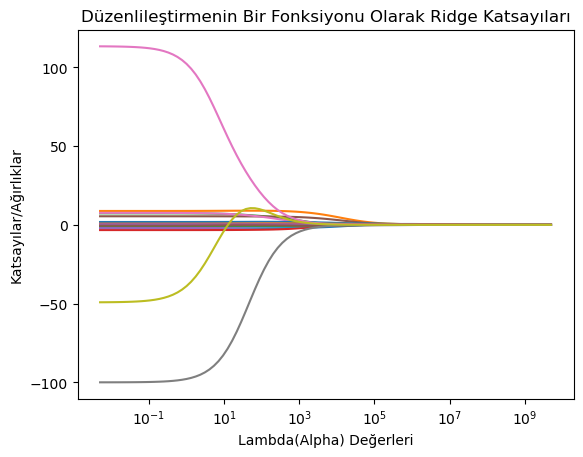

In [306]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

### Ridge Model Tahmin ve Tuning (Hiperparametre Ayarı)

In [312]:
y_pred = ridge_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_pred)))
r2_score(y_train,y_pred)

289.3292830531484


0.5770075235888348

In [313]:
from sklearn.model_selection import GridSearchCV

ridge_params = {"alpha": np.logspace(-3, 3, 100)}  # 0.001 ile 1000 arasında değerler deniyoruz
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=10)
ridge_cv.fit(X_train_scaled, y_train)

# En iyi alpha değeri
print("En iyi alpha:", ridge_cv.best_params_)


En iyi alpha: {'alpha': 284.8035868435805}


In [314]:
ridge = Ridge(alpha=284.0)  # Lambda (alpha) değeri burada belirleniyor
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=284.0)

In [315]:
y_pred = ridge.predict(X_train_scaled)
print(np.sqrt(mean_squared_error(y_train, y_pred)))
r2_score(y_train,y_pred)

315.91622156519566


0.49569681145381506

In [316]:
y_pred = ridge.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test,y_pred)

388.145001605332


0.3040491768100082

##  Lasso Regresyonu (L1 Regresyon)

Eğer gereksiz değişkenleri modelden atmak istiyorsak, Lasso mükemmel bir yöntemdir.

Ancak bazı durumlarda fazla agresif olabilir ve önemli değişkenleri de silebilir.

In [304]:
from sklearn.linear_model import Lasso

# Lasso modelini eğitme
lasso = Lasso(alpha=0.1)  # Alpha (lambda) değerini belirliyoruz
lasso.fit(X_train_scaled, y_train)

# Katsayıları inceleyelim
print("Lasso Katsayıları:", lasso.coef_)


Lasso Katsayıları: [-245.60086636  364.43895967   57.34351527  -71.20326137  -46.49599291
  110.18051787   36.85518264 -355.71940583  -24.45214723  -17.42833006
  539.26708321  184.30366948 -165.0970004    80.33668818   37.61683294
   -4.3025222    56.48349535  -50.40197379  -24.46210781]


C:\Users\frkng\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+05, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [305]:
lasso_params = {"alpha": np.logspace(-3, 3, 100)}
lasso_cv = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=10)
lasso_cv.fit(X_train_scaled, y_train)

# En iyi alpha değeri
print("En iyi alpha:", lasso_cv.best_params_)


C:\Users\frkng\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+04, tolerance: 3.617e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\frkng\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.731e+03, tolerance: 3.617e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\frkng\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.657e+03, tolerance: 3.617e

En iyi alpha: {'alpha': 53.366992312063125}


In [317]:
y_pred = lasso.predict(X_train_scaled)
print(np.sqrt(mean_squared_error(y_train, y_pred)))
r2_score(y_train,y_pred)

289.37863847285263


0.576863198398931

In [ ]:
y_pred = ridge.predict(X_train_scaled)
print(np.sqrt(mean_squared_error(y_train, y_pred)))
r2_score(y_train,y_pred)

In [318]:
y_pred = lasso.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test,y_pred)

356.857115278473


0.41172650952183387

## ElasticNet Regresyonu

In [319]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [320]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
enet_model.coef_
enet_model.intercept_

C:\Users\frkng\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


-6.465955602111762

### Tahmin

In [322]:
enet_model
enet_model.predict(X_test)
y_pred = enet_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

357.16765481812445


0.4107022246932692

### Model Tuning

In [324]:
from sklearn.linear_model import ElasticNetCV
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)
print(enet_cv_model.alpha_)
print(enet_cv_model)
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

5230.764736479864
ElasticNetCV(cv=10, random_state=0)
394.15280563218795


0.2823382467773815